In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!python -V

Python 3.8.16


In [2]:
from pycaret.classification import *

In [3]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Setup de los datos 
setup(data = df,
     target="Survived",
     ignore_features = ["Name", "Ticket", "PassengerId"])

,Description,Value
0,Session id,8076
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 11)"
5,Transformed train set shape,"(623, 11)"
6,Transformed test set shape,"(268, 11)"
7,Ignore features,3
8,Ordinal features,1
9,Numeric features,5


In [6]:
# Comparar modelos # Herramientas de autoML

compare_models() #Compara la eficiencia de varios modelos diferentes con este set de datos, es loquisimo

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7975,0.8502,0.6862,0.7639,0.7203,0.5631,0.5670,0.0500
ridge,Ridge Classifier,0.7959,0.0000,0.6819,0.7624,0.7174,0.5592,0.5631,0.0420
lr,Logistic Regression,0.7911,0.8519,0.6942,0.7439,0.7158,0.5516,0.5542,0.0640
et,Extra Trees Classifier,0.7801,0.8260,0.5444,0.8268,0.6507,0.5022,0.5287,0.0920
nb,Naive Bayes,0.7654,0.8192,0.5438,0.7942,0.6390,0.4748,0.4980,0.0520
rf,Random Forest Classifier,0.7143,0.8388,0.3266,0.8362,0.4614,0.3175,0.3851,0.0960
catboost,CatBoost Classifier,0.7095,0.8201,0.3136,0.8265,0.4485,0.3038,0.3717,0.0490
dt,Decision Tree Classifier,0.7063,0.6299,0.3013,0.8380,0.4397,0.2950,0.3682,0.0560
lightgbm,Light Gradient Boosting Machine,0.7047,0.7557,0.3053,0.8198,0.4415,0.2927,0.3610,0.0590
xgboost,Extreme Gradient Boosting,0.7014,0.7930,0.2969,0.8050,0.4317,0.2835,0.3494,0.0660


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [7]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6984,0.7821,0.2500,0.8571,0.3871,0.2597,0.3467
1,0.6667,0.7543,0.3333,0.6154,0.4324,0.2250,0.2462
2,0.7619,0.9103,0.3750,1.0000,0.5455,0.4262,0.5204
3,0.8065,0.9452,0.5417,0.9286,0.6842,0.5582,0.6004
4,0.6774,0.7807,0.2500,0.7500,0.3750,0.2250,0.2868
5,0.7097,0.8235,0.2917,0.8750,0.4375,0.3025,0.3855
6,0.7258,0.8372,0.3333,0.8889,0.4848,0.3470,0.4245
7,0.7097,0.8893,0.2500,1.0000,0.4000,0.2901,0.4119
8,0.6774,0.7368,0.2500,0.7500,0.3750,0.2250,0.2868


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [8]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6984,0.7201,0.2500,0.8571,0.3871,0.2597,0.3467
1,0.6508,0.6581,0.2917,0.5833,0.3889,0.1809,0.2022
2,0.7460,0.7778,0.3333,1.0000,0.5000,0.3824,0.4862
3,0.7742,0.9397,0.4167,1.0000,0.5882,0.4668,0.5518
4,0.6774,0.7237,0.2917,0.7000,0.4118,0.2383,0.2817
5,0.7258,0.7599,0.3750,0.8182,0.5143,0.3581,0.4110
6,0.7258,0.7681,0.3333,0.8889,0.4848,0.3470,0.4245
7,0.7097,0.8586,0.2500,1.0000,0.4000,0.2901,0.4119
8,0.6452,0.6842,0.2500,0.6000,0.3529,0.1622,0.1917


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [9]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8419,0.7500,0.8571,0.8000,0.6897,0.6934
1,0.8413,0.8729,0.7917,0.7917,0.7917,0.6635,0.6635
2,0.8571,0.8921,0.7917,0.8261,0.8085,0.6947,0.6951
3,0.8387,0.9145,0.7500,0.8182,0.7826,0.6548,0.6564
4,0.8065,0.8366,0.6667,0.8000,0.7273,0.5792,0.5850
5,0.7258,0.7961,0.6667,0.6400,0.6531,0.4266,0.4268
6,0.7903,0.8459,0.6667,0.7619,0.7111,0.5477,0.5507
7,0.7097,0.8443,0.4583,0.6875,0.5500,0.3481,0.3637
8,0.7903,0.8169,0.6250,0.7895,0.6977,0.5405,0.5491


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [10]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.7970,0.2500,1.0000,0.4000,0.2921,0.4136
1,0.6667,0.5732,0.2917,0.6364,0.4000,0.2111,0.2419
2,0.7460,0.7746,0.3333,1.0000,0.5000,0.3824,0.4862
3,0.7581,0.9101,0.4167,0.9091,0.5714,0.4336,0.4977
4,0.6774,0.7456,0.2500,0.7500,0.3750,0.2250,0.2868
5,0.6774,0.7692,0.2917,0.7000,0.4118,0.2383,0.2817
6,0.7097,0.7884,0.2917,0.8750,0.4375,0.3025,0.3855
7,0.7097,0.8536,0.2500,1.0000,0.4000,0.2901,0.4119
8,0.6452,0.6595,0.2083,0.6250,0.3125,0.1475,0.1880


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6984,0.7318,0.2500,0.8571,0.3871,0.2597,0.3467
1,0.6190,0.6918,0.2083,0.5000,0.2941,0.0903,0.1065
2,0.7143,0.8381,0.2500,1.0000,0.4000,0.2921,0.4136
3,0.7258,0.9468,0.3333,0.8889,0.4848,0.3470,0.4245
4,0.6935,0.7955,0.3333,0.7273,0.4571,0.2826,0.3243
5,0.6935,0.7336,0.2917,0.7778,0.4242,0.2701,0.3305
6,0.6935,0.8185,0.3333,0.7273,0.4571,0.2826,0.3243
7,0.7097,0.8218,0.2500,1.0000,0.4000,0.2901,0.4119
8,0.6290,0.7330,0.2083,0.5556,0.3030,0.1165,0.1425


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [12]:
# Ahora vamos a intentar afinar el modelo (tunearlo)
tune_gbc_acc = tune_model(gbc,optimize="Accuracy")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6984,0.8173,0.2083,1.0000,0.3448,0.2457,0.3743
1,0.7460,0.7831,0.3750,0.9000,0.5294,0.3935,0.4643
2,0.7302,0.9327,0.2917,1.0000,0.4516,0.3377,0.4507
3,0.7903,0.9386,0.4583,1.0000,0.6286,0.5091,0.5844
4,0.6774,0.8218,0.2083,0.8333,0.3333,0.2112,0.2999
5,0.7258,0.8525,0.2917,1.0000,0.4516,0.3354,0.4489
6,0.7097,0.8717,0.2500,1.0000,0.4000,0.2901,0.4119
7,0.6935,0.9364,0.2083,1.0000,0.3448,0.2439,0.3727
8,0.6935,0.7626,0.2500,0.8571,0.3871,0.2573,0.3443


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [13]:
tune_gbc_acc = tune_model(gbc,optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6984,0.8173,0.2083,1.0000,0.3448,0.2457,0.3743
1,0.7460,0.7831,0.3750,0.9000,0.5294,0.3935,0.4643
2,0.7302,0.9327,0.2917,1.0000,0.4516,0.3377,0.4507
3,0.7903,0.9386,0.4583,1.0000,0.6286,0.5091,0.5844
4,0.6774,0.8218,0.2083,0.8333,0.3333,0.2112,0.2999
5,0.7258,0.8525,0.2917,1.0000,0.4516,0.3354,0.4489
6,0.7097,0.8717,0.2500,1.0000,0.4000,0.2901,0.4119
7,0.6935,0.9364,0.2083,1.0000,0.3448,0.2439,0.3727
8,0.6935,0.7626,0.2500,0.8571,0.3871,0.2573,0.3443


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


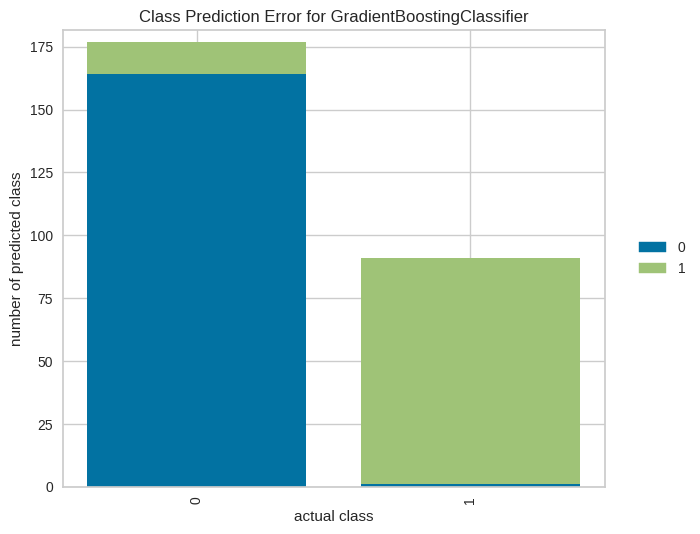

In [14]:
# Visualizacion de los datos
plot_model(tune_gbc_acc, plot='error')

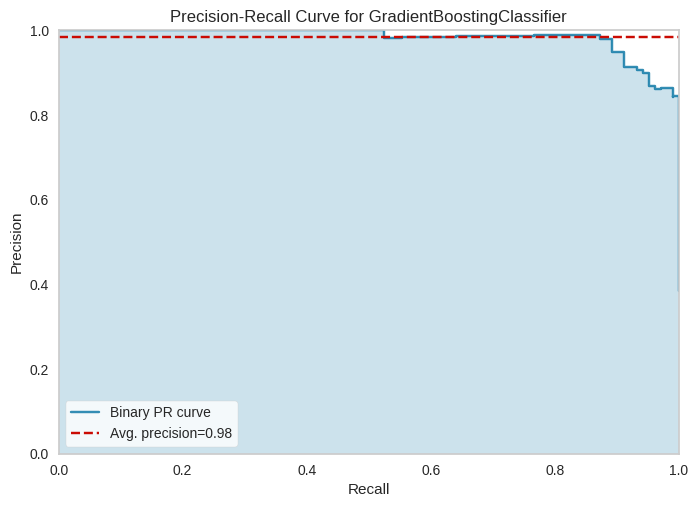

In [15]:
plot_model(tune_gbc_acc, plot='pr')

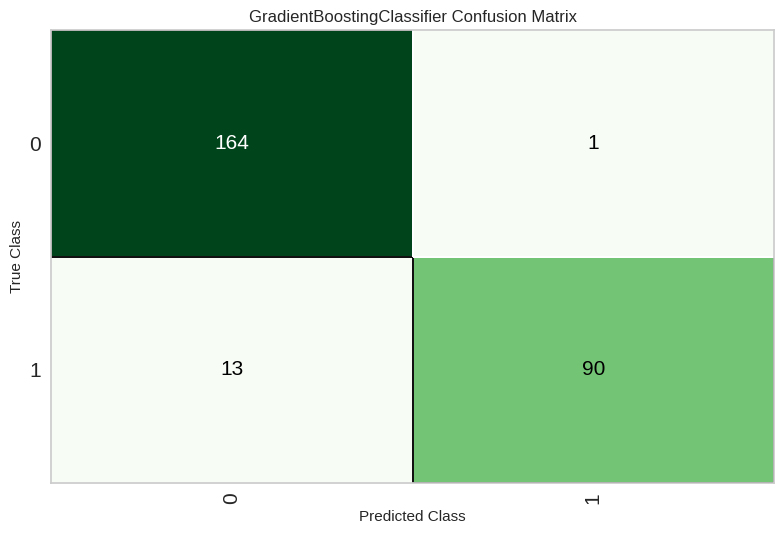

In [16]:
plot_model(tune_gbc_acc, plot='confusion_matrix')

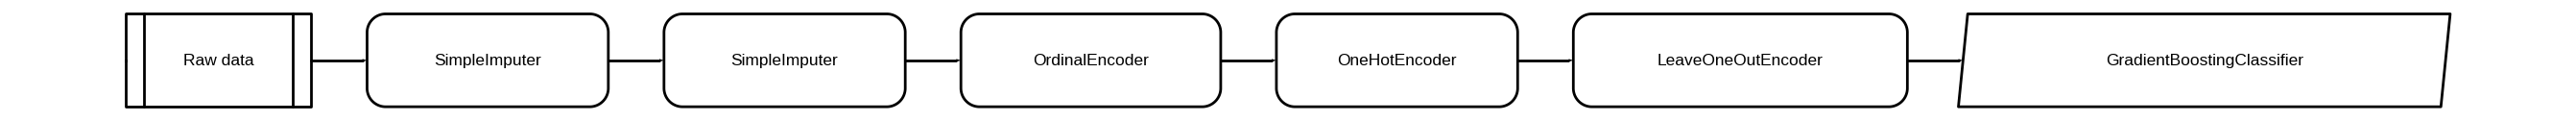

In [17]:
# Un poco de todo:
evaluate_model(tune_gbc_acc)

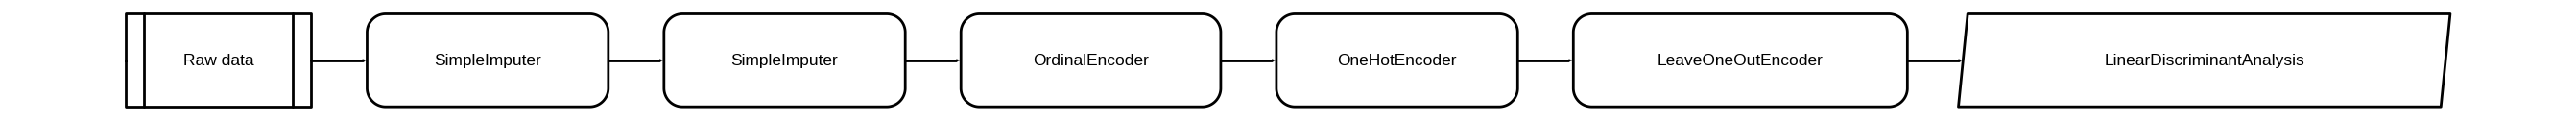

In [19]:
evaluate_model(lda)

In [20]:
# Predecir
test = pd.read_csv("/home/jovyan/work/test.csv")
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [21]:
predicciones = predict_model(tune_gbc_acc, data=test)

In [22]:
predicciones

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prediction_label,prediction_score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.829200,NaN,Q,0,0.8950
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.000000,NaN,S,0,0.8000
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.687500,NaN,Q,0,0.8838
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.662500,NaN,S,0,0.8893
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.287500,NaN,S,0,0.7731
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S,0,0.8893
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900002,C105,C,1,0.7669
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,0,0.8956
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S,0,0.8893


In [25]:
predicciones_kaggle = predicciones[["PassengerId", "prediction_label"]]
predicciones_kaggle.tail(2)

,PassengerId,prediction_label
416,1308,0
417,1309,0


In [26]:
submissions = pd.read_csv("gender_submission.csv")

In [27]:
submissions.tail(1)

,PassengerId,Survived
417,1309,0


In [28]:
# Ceamos el archivo para kaggle
submissions.to_csv('./titanic_pycaret_P9.csv',index=False)